In [5]:
import json

import numpy as np
import os

import matplotlib.pyplot as plt

In [10]:
parent_dir = '/network/scratch/s/sonia.joseph/imagenet_logit_ablation_stats'



key_to_extract = 'abs_diff'

def get_values(key_to_extract):

    total_attn_heads = {}
    total_mlp = {}

    for i in range(1000):
        file_name = f'label_{i}.json'
        full_path = os.path.join(parent_dir, file_name)
        try:
            with open(full_path, 'r') as file:
                data = json.load(file)
                array = np.array(data['head_level'])
                extracted_values = [d[key_to_extract] for sublist in array for d in sublist if key_to_extract in d]
                original_shape = (len(array), len(array[0]))
                reshaped_array = np.array(extracted_values).reshape(original_shape)

                for i, entry in enumerate(reshaped_array):
                    if i % 2 == 0 : 
                        for j, h in enumerate(entry):
                            idx = i+j+12*i
                            total_attn_heads.setdefault(idx, [])
                            total_attn_heads[idx].append(h)
                    else:
                        total_mlp.setdefault(i, [])
                        total_mlp[i].append(entry[0])
        except:
            print('skipped', i)
            pass
    
    return total_attn_heads, total_mlp

#         if i > 1:
#             break
#     except Exception as e:
#         pass 
# #         print(e)

total_attn_heads, total_mlp = get_values(key_to_extract)

skipped 78
skipped 79
skipped 85
skipped 90
skipped 155
skipped 156
skipped 197
skipped 205
skipped 206
skipped 209
skipped 210
skipped 235
skipped 236
skipped 262
skipped 269
skipped 296
skipped 305
skipped 306
skipped 307
skipped 310
skipped 329
skipped 368
skipped 370
skipped 377
skipped 385
skipped 421
skipped 428
skipped 429
skipped 437
skipped 438
skipped 443
skipped 445
skipped 449
skipped 450
skipped 453
skipped 469
skipped 488
skipped 494
skipped 500
skipped 501
skipped 502
skipped 503
skipped 512
skipped 513
skipped 520
skipped 531
skipped 532
skipped 533
skipped 534
skipped 546
skipped 549
skipped 551
skipped 552
skipped 559
skipped 560
skipped 565
skipped 567
skipped 568
skipped 573
skipped 587
skipped 591
skipped 599
skipped 606
skipped 609
skipped 612
skipped 613
skipped 622
skipped 623
skipped 630
skipped 639
skipped 641
skipped 644
skipped 654
skipped 657
skipped 658
skipped 662
skipped 676
skipped 678
skipped 679
skipped 680
skipped 683
skipped 701
skipped 702
skipped 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297]


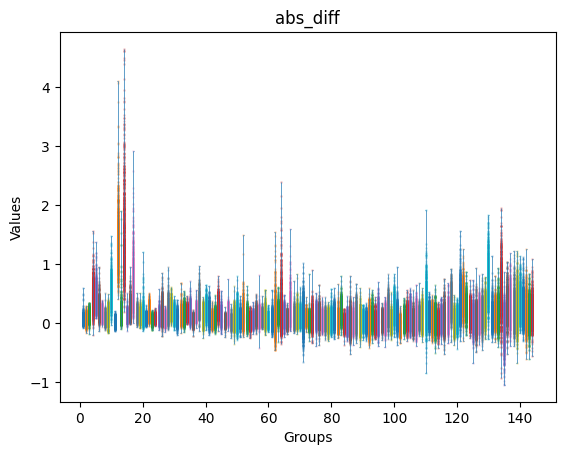

In [21]:
plt.figure()
data_values = list(total_attn_heads.values())
labels = list(total_attn_heads.keys())

# Create violin plot
vp = plt.violinplot(data_values)

# Adjust the line width of the stems
for partname in ('cmaxes', 'cmins', 'cbars'):
    vp[partname].set_linewidth(0.5)
    
for i in range(len(data_values)):
    plt.scatter([i + 1] * len(data_values[i]), data_values[i], alpha=0.2, s = 1)

plt.title(f"{key_to_extract}")
plt.xlabel("Groups")
plt.ylabel("Values")

print(labels)


In [8]:
# Get specific cat logit

parent_dir = '/network/scratch/s/sonia.joseph/imagenet_logit_ablation_stats'
file_name = f'label_{285}.json'

with open(os.path.join(parent_dir, file_name), 'r') as file:
    data = json.load(file)

plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure()
data_values = list(total_mlp.values())
labels = list(total_mlp.keys())

plt.violinplot(data_values)
plt.xticks(range(1, len(labels) + 1), labels)

for i in range(len(data_values)):
    plt.scatter([i + 1] * len(data_values[i]), data_values[i], alpha=0.2)

plt.title(f"{key_to_extract}")
plt.xlabel("Groups")
plt.ylabel("Values")



NameError: name 'total_mlp' is not defined

<Figure size 640x480 with 0 Axes>

In [113]:
# attn_heads, mlp = get_values('raw_ablated_logit')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297]


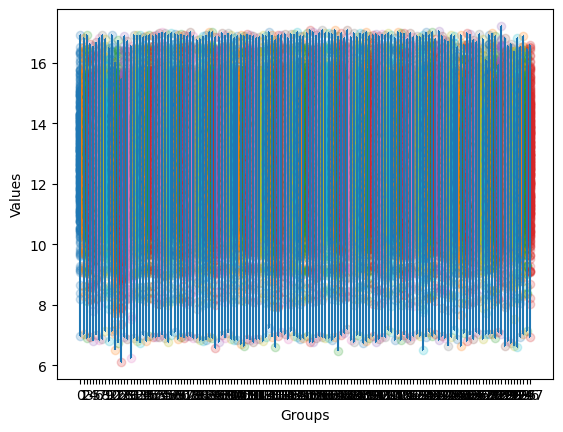

In [100]:
plt.figure()
data_values = list(attn_heads.values())
labels = list(attn_heads.keys())

plt.violinplot(data_values)
plt.xticks(range(1, len(labels) + 1), labels)

for i in range(len(data_values)):
    plt.scatter([i + 1] * len(data_values[i]), data_values[i], alpha=0.2)

plt.xlabel("Groups")
plt.ylabel("Values")

print(labels)


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


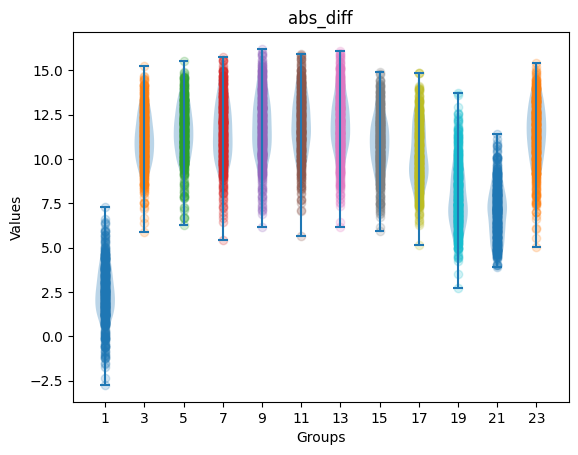

In [101]:
plt.figure()
data_values = list(mlp.values())
labels = list(mlp.keys())

plt.violinplot(data_values)
plt.xticks(range(1, len(labels) + 1), labels)

for i in range(len(data_values)):
    plt.scatter([i + 1] * len(data_values[i]), data_values[i], alpha=0.2)

plt.title(f"{key_to_extract}")
plt.xlabel("Groups")
plt.ylabel("Values")

print(labels)


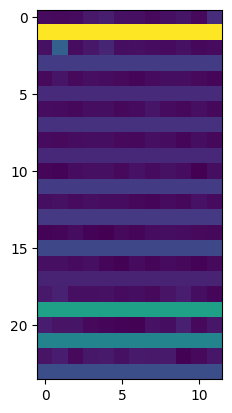

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(reshaped_array)